#### Importation des librairies

In [27]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

from utils import dataframe_info

In [30]:
master_df = pd.read_csv('./viz/dataviz.csv', low_memory = False)

In [31]:
dataframe_info(master_df)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,DateAndTimeMobilised,2365940,0,0.00,object,2009-01-01 00:02:27
1,DateAndTimeMobile,2338168,27772,1.17,object,2009-01-01 00:06:40
2,DateAndTimeArrived,2365940,0,0.00,object,2009-01-01 00:07:46
3,AttendanceTimeSeconds,2365940,0,0.00,int64,319
4,DateAndTimeLeft,2319613,46327,1.96,object,2009-01-01 00:16:46
5,DeployedFromStation_Name,2365917,23,0.00,object,Battersea
6,DeployedFromLocation,2364778,1162,0.05,object,Home Station
7,PumpOrder,2365940,0,0.00,int64,1
8,PlusCode_Description,2365940,0,0.00,object,Initial Mobilisation
9,IncidentGroup,2365940,0,0.00,object,Special Service


#### Création de tableaux pour les plots

In [5]:
# Suppresion pour cause d'inutilité ou de doublon
variables_drop =['DateAndTimeCalled','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft']
master_df = master_df.drop(labels = variables_drop, axis = 1)

In [72]:
#master_df.head(5)

In [73]:
#for i in master_df.columns :
#    print(master_df[i].value_counts())
#    print('-------------------------------------')

#### Distribution de la valeur target

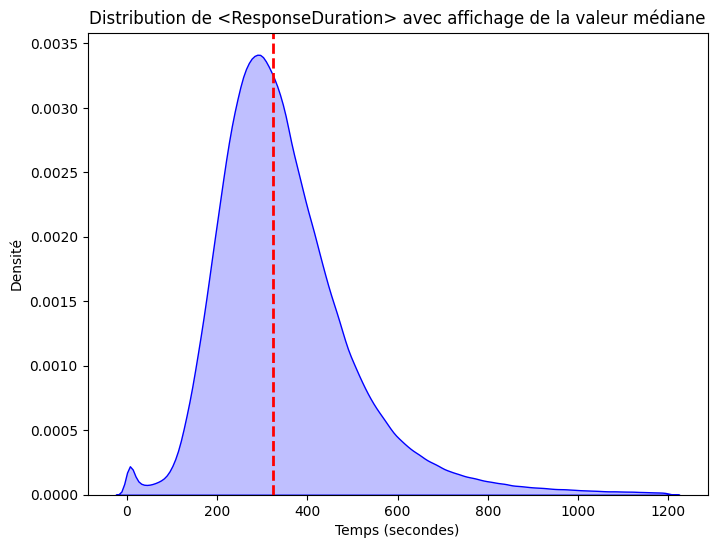

In [260]:
mean_value = master_df['ResponseDuration'].median()

# Utiliser Seaborn pour créer un KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(master_df['ResponseDuration'], fill = True, color='blue')

# Ajouter une ligne verticale pour la moyenne
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Ajouter des titres et des étiquettes
plt.title('Distribution de <ResponseDuration> avec affichage de la valeur médiane')
plt.xlabel('Temps (secondes)')
plt.ylabel('Densité')

# Afficher le graphique
plt.show()

In [ ]:
#### Corrmean_value = master_df['ResponseDuration'].median()

# Utiliser Seaborn pour créer un KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(master_df['ResponseDuration'], fill = True, color='blue')

# Ajouter une ligne verticale pour la moyenne
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Ajouter des titres et des étiquettes
plt.title('Distribution de <ResponseDuration> avec affichage de la valeur médiane')
plt.xlabel('Temps (secondes)')
plt.ylabel('Densité')

# Afficher le graphique
plt.show()elation Matrix

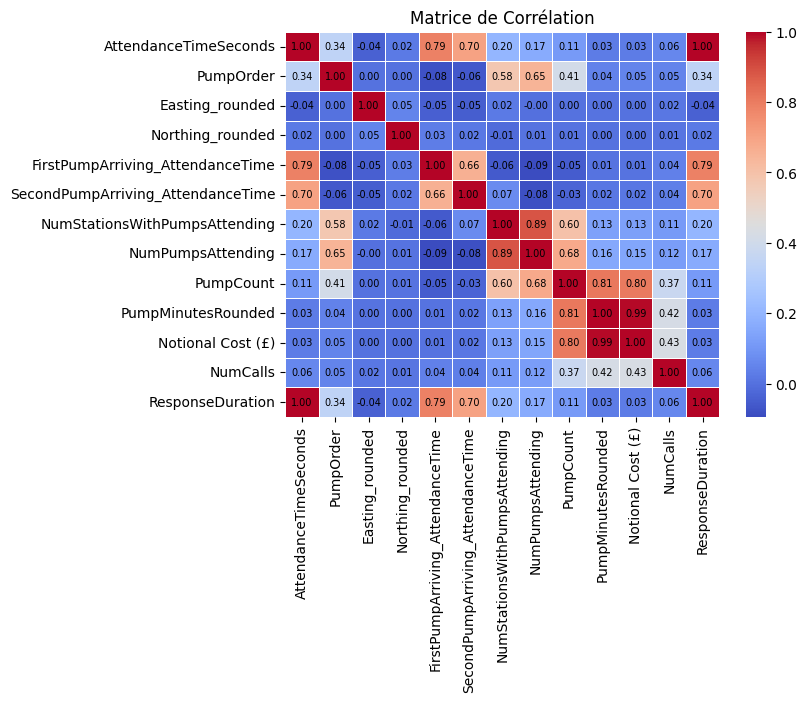

In [305]:
df_numeric = master_df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(labels = ["UPRN","USRN","IncidentNumber"],axis =1)
corr_matrix = df_numeric.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 7, "color": "black"})
plt.title('Matrice de Corrélation')
plt.show()

#### Graphiques MAPS

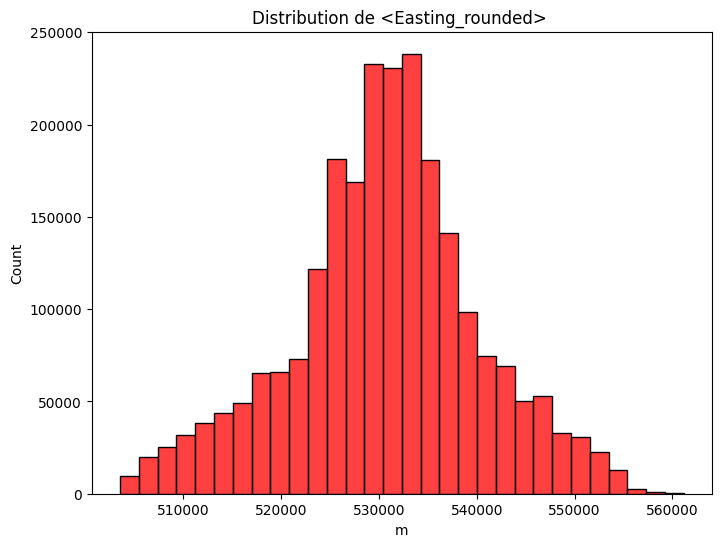

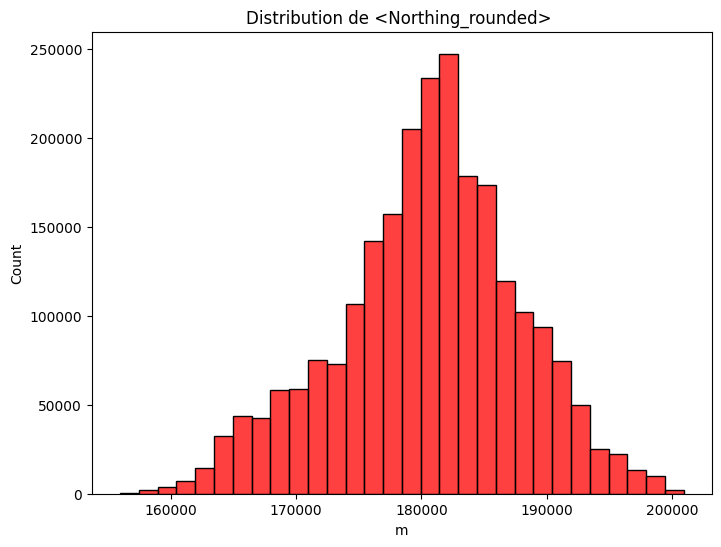

In [6]:

# Utiliser Seaborn pour créer un KDE plot
plt.figure(figsize=(8, 6))
sns.histplot(master_df['Easting_rounded'], bins = 30, color='red')

# Ajouter des titres et des étiquettes
plt.title('Distribution de <Easting_rounded> ')
plt.xlabel('m')

# Afficher le graphique
plt.show()

# Utiliser Seaborn pour créer un KDE plot
plt.figure(figsize=(8, 6))
sns.histplot(master_df['Northing_rounded'], bins = 30, color='red')

# Ajouter des titres et des étiquettes
plt.title('Distribution de <Northing_rounded> ')
plt.xlabel('m')

# Afficher le graphique
plt.show()

/var/folders/rg/8x31xcvn0hddrq5cpz770vhc0000gn/T/ipykernel_25659/1137126721.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_northing = master_df.groupby('Northing_binned')['ResponseDuration'].median().reset_index()
/var/folders/rg/8x31xcvn0hddrq5cpz770vhc0000gn/T/ipykernel_25659/1137126721.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_easting = master_df.groupby('Easting_binned')['ResponseDuration'].median().reset_index()
/var/folders/rg/8x31xcvn0hddrq5cpz770vhc0000gn/T/ipykernel_25659/1137126721.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

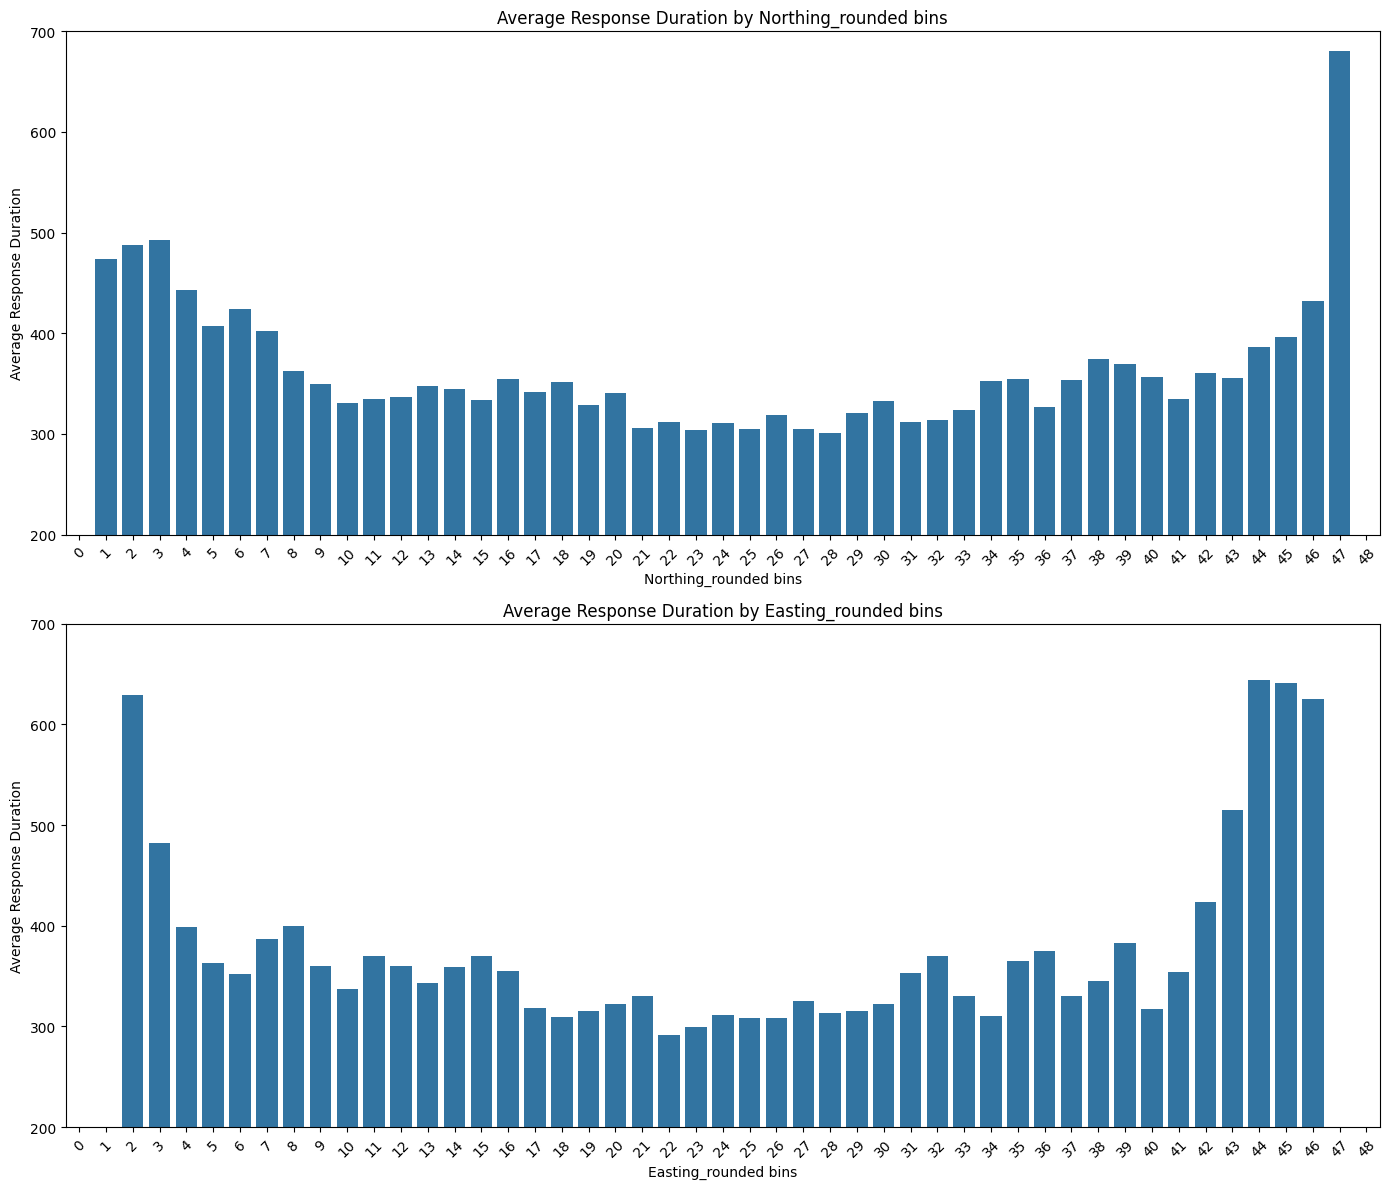

In [17]:
# Définir les bins pour Northing_rounded
bins_northing = np.linspace(154000, 202000, 50)
master_df['Northing_binned'] = pd.cut(master_df['Northing_rounded'], bins_northing)

# Groupby pour calculer la moyenne de ResponseDuration par bins de Northing_rounded
grouped_northing = master_df.groupby('Northing_binned')['ResponseDuration'].median().reset_index()

# Préparation des données pour l'affichage
grouped_northing['Northing_binned'] = grouped_northing['Northing_binned'].astype(str)

# Définir les bins pour Easting_rounded
bins_easting = np.linspace(500000, 565000, 50)
master_df['Easting_binned'] = pd.cut(master_df['Easting_rounded'], bins_easting)

# Groupby pour calculer la moyenne de ResponseDuration par bins de Easting_rounded
grouped_easting = master_df.groupby('Easting_binned')['ResponseDuration'].median().reset_index()

# Préparation des données pour l'affichage
grouped_easting['Easting_binned'] = grouped_easting['Easting_binned'].astype(str)

# Création des subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot pour Northing
sns.barplot(x='Northing_binned', y='ResponseDuration', data=grouped_northing, ax=axes[0])
axes[0].set_xlabel('Northing_rounded bins')
axes[0].set_ylabel('Average Response Duration')
axes[0].set_title('Average Response Duration by Northing_rounded bins')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)
axes[0].set_ylim(200, 700)

# Arrondir les étiquettes des xticks à la virgule près pour Northing
xticks = axes[0].get_xticks()
xticks_labels = [round(tick, 1) for tick in xticks]
axes[0].set_xticklabels(xticks_labels)

# Plot pour Easting
sns.barplot(x='Easting_binned', y='ResponseDuration', data=grouped_easting, ax=axes[1])
axes[1].set_xlabel('Easting_rounded bins')
axes[1].set_ylabel('Average Response Duration')
axes[1].set_title('Average Response Duration by Easting_rounded bins')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)
axes[1].set_ylim(200, 700)

# Arrondir les étiquettes des xticks à la virgule près pour Easting
xticks = axes[1].get_xticks()
xticks_labels = [round(tick, 1) for tick in xticks]
axes[1].set_xticklabels(xticks_labels)

plt.tight_layout()
plt.show()

In [334]:
df_geo = master_df[['ResponseDuration','DateAndTimeMobilised','Northing_rounded','Easting_rounded','Postcode_district']]

In [335]:
postcodes = pd.read_csv('./ukpostcodes/ukpostcodes.csv')

Conservation de la première partie du postcode uniquement dans Postcode_district

In [336]:
postcodes['postcode'] = postcodes['postcode'].astype(str)
postcodes['postcode'] = postcodes['postcode'].apply(lambda x: x.lstrip())
postcodes['Postcode_district'] = postcodes['postcode'].apply(lambda x: x.split(' ')[0])

##### MAP1

In [337]:
dfmap = df_geo.groupby('Postcode_district')['ResponseDuration'].mean().reset_index()

In [338]:
map = pd.merge(dfmap, postcodes, left_on = 'Postcode_district', right_on = 'Postcode_district', how = 'inner').reset_index()

In [339]:
map = map.groupby('Postcode_district').agg({
    'ResponseDuration': 'mean',            # Compter la moyenne de la durée d'intervention
    'latitude': 'mean',                    # Calculer la moyenne de 'latitude'
    'longitude': 'mean'                    # Calculer la moyenne de 'longitude'
}).reset_index().reset_index()

In [340]:
dataframe_info(map)
#nan_rows = map[map['latitude'].isna()]
#nan_rows

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,index,306,0,0.0,int64,0
1,Postcode_district,306,0,0.0,object,BR1
2,ResponseDuration,306,0,0.0,float64,350.169658
3,latitude,306,0,0.0,float64,51.41202
4,longitude,306,0,0.0,float64,0.020913


In [342]:
import folium
import pandas as pd
from branca.colormap import LinearColormap

data = map

df = pd.DataFrame(data)

# Initialize the map
mymap = folium.Map(location=[30, 0], zoom_start=2)

# Créer une palette de couleurs
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=df['ResponseDuration'].min(), vmax=df['ResponseDuration'].max())

# Ajouter des marqueurs à la carte
for index, row in df.iterrows():
    color = colormap(row['ResponseDuration'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        tooltip=f"Value: {row['ResponseDuration']}"  # Ajouter la valeur comme tooltip
    ).add_to(mymap)

# Ajouter la légende à la carte
colormap.caption = 'Response Duration'
colormap.add_to(mymap)


# Save the map as an HTML file (optional)
mymap.save('mapmeantime.html')

# Display the map
mymap

##### MAP2

In [179]:
dfmap = df_geo.groupby('Postcode_district')['ResponseDuration'].count().reset_index()

In [180]:
dataframe_info(dfmap)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,Postcode_district,324,0,0.0,object,BF1
1,ResponseDuration,324,0,0.0,int64,11


In [181]:
map = pd.merge(dfmap, postcodes, left_on = 'Postcode_district', right_on = 'Postcode_district', how = 'inner').reset_index()

In [182]:
dataframe_info(map)

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,index,199105,0,0.00,int64,0
1,Postcode_district,199105,0,0.00,object,BR1
2,ResponseDuration,199105,0,0.00,int64,13203
3,id,199105,0,0.00,int64,1537125
4,postcode,199105,0,0.00,object,BR1 5SN
5,latitude,199038,67,0.03,float64,51.421734
6,longitude,199038,67,0.03,float64,0.020647


In [183]:
map = map.groupby('Postcode_district').agg({
    'ResponseDuration': 'min',            # Compter la moyenne de la durée d'intervention
    'latitude': 'mean',                    # Calculer la moyenne de 'latitude'
    'longitude': 'mean'                    # Calculer la moyenne de 'longitude'
}).reset_index().reset_index()

In [184]:
dataframe_info(map)
#nan_rows = map[map['latitude'].isna()]
#nan_rows

,Column,Non-Null Count,NaN Count,NaN Percentage,Dtype,Example Value
0,index,306,0,0.0,int64,0
1,Postcode_district,306,0,0.0,object,BR1
2,ResponseDuration,306,0,0.0,int64,13203
3,latitude,306,0,0.0,float64,51.41202
4,longitude,306,0,0.0,float64,0.020913


In [185]:
import folium
import pandas as pd
from branca.colormap import LinearColormap

data = map

df = pd.DataFrame(data)

# Initialize the map
mymap = folium.Map(location=[30, 0], zoom_start=2)

# Créer une palette de couleurs
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=df['ResponseDuration'].min(), vmax=df['ResponseDuration'].max())

# Ajouter des marqueurs à la carte
for index, row in df.iterrows():
    color = colormap(row['ResponseDuration'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        tooltip=f"Value: {row['ResponseDuration']}"  # Ajouter la valeur comme tooltip
    ).add_to(mymap)

# Save the map as an HTML file (optional)
mymap.save('mapmeantime.html')

# Display the map
mymap

#### Année/mois/weekday/heure

In [193]:
# Convertir la colonne 'datetime' en type datetime
time_df = master_df
time_df['DateAndTimeMobilised'] = pd.to_datetime(time_df['DateAndTimeMobilised'])

# Créer les colonnes 'year', 'month', 'weekday' et 'hour'
time_df['year'] = time_df['DateAndTimeMobilised'].dt.year
time_df['month'] = time_df['DateAndTimeMobilised'].dt.month
time_df['weekday'] = time_df['DateAndTimeMobilised'].dt.weekday  # Monday=0, Sunday=6
time_df['hour'] = time_df['DateAndTimeMobilised'].dt.hour

##### Year

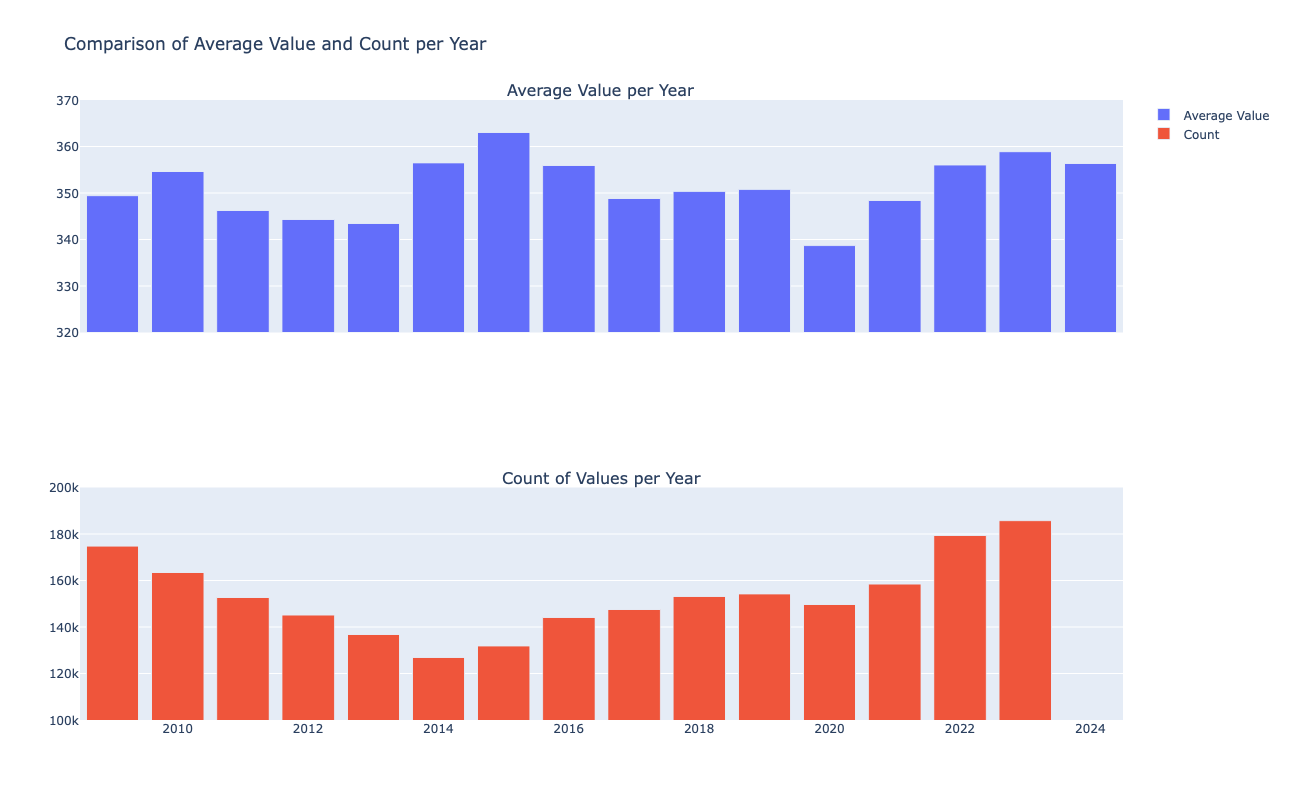

In [235]:

# Grouper par 'year' et calculer la moyenne des valeurs et leur nombre
grouped_mean = time_df.groupby('year')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('year')['ResponseDuration'].count().reset_index()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Average Value per Year", "Count of Values per Year"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['year'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['year'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1) 
fig.update_yaxes(range=[100000, 200000], row=2, col=1) 

# Mettre à jour les annotations et les titres
fig.update_layout(title='Comparison of Average Value and Count per Year',
                  height=800, width=800, showlegend=True)


fig.show()

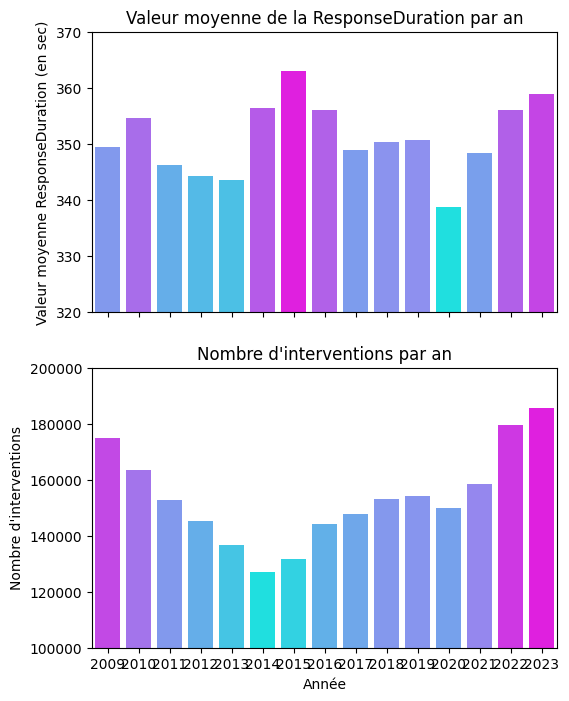

In [275]:

# Filtrer les données pour exclure l'année 2024
time_df_filtered = time_df[time_df['year'] != 2024]

# Calculer la moyenne et le compte par année
grouped_mean = time_df_filtered.groupby('year')['ResponseDuration'].mean().reset_index()
grouped_count = time_df_filtered.groupby('year')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='year', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='year', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par an')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='year', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='year', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par an")
axs[1].set_ylabel("Nombre d'interventions")
axs[1].set_ylim(100000, 200000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque année", fontsize=16)
plt.xlabel('Année')

# Afficher le graphique
plt.show()

##### Month

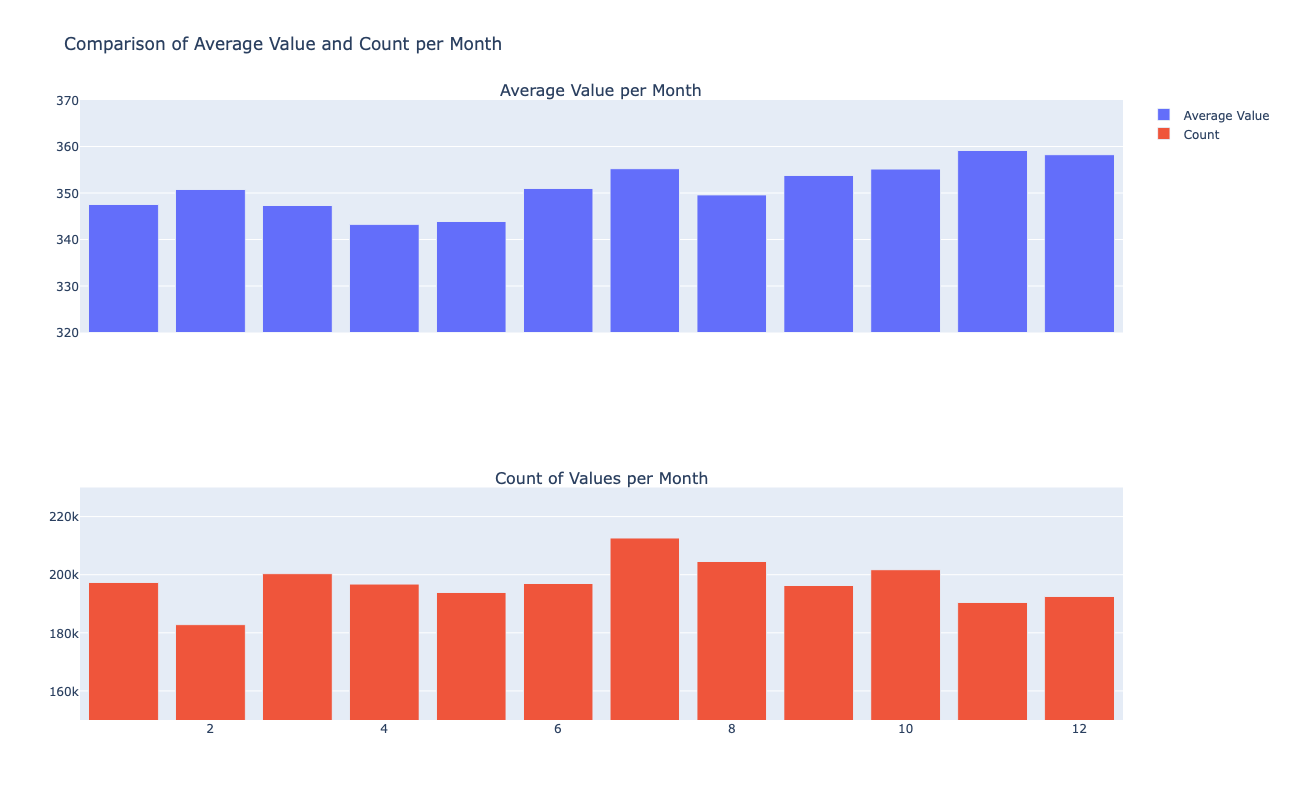

In [236]:

# Grouper par 'month' et calculer la moyenne des valeurs
grouped_mean = time_df.groupby('month')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('month')['ResponseDuration'].count().reset_index()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Average Value per Month", "Count of Values per Month"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['month'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['month'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot
fig.update_yaxes(range=[150000, 230000], row=2, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot


# Mettre à jour les annotations et les titres
fig.update_layout(title='Comparison of Average Value and Count per Month',
                  height=800, width=800, showlegend=True)

fig.show()

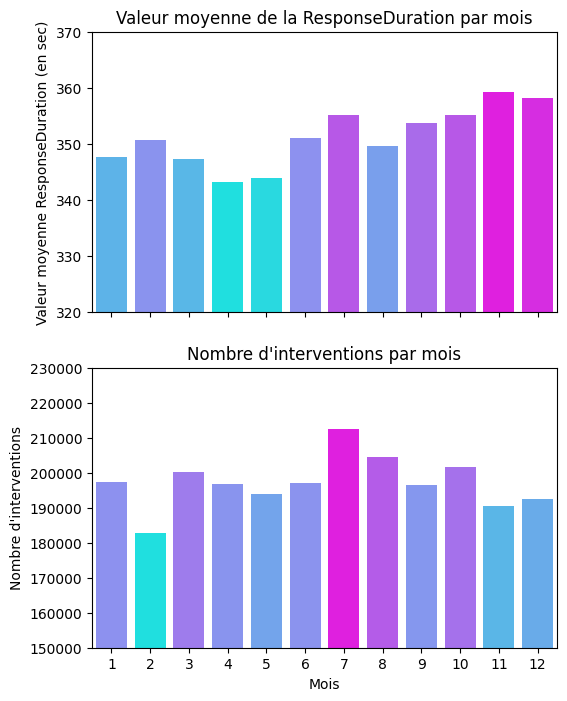

In [276]:
# Calculer la moyenne et le compte par mois
grouped_mean = time_df.groupby('month')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('month')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='month', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='month', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par mois')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='month', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='month', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par mois")
axs[1].set_ylabel("Nombre d'interventions")
axs[1].set_ylim(150000, 230000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque mois", fontsize=16)
plt.xlabel('Mois')

# Afficher le graphique
plt.show()

##### Weekday

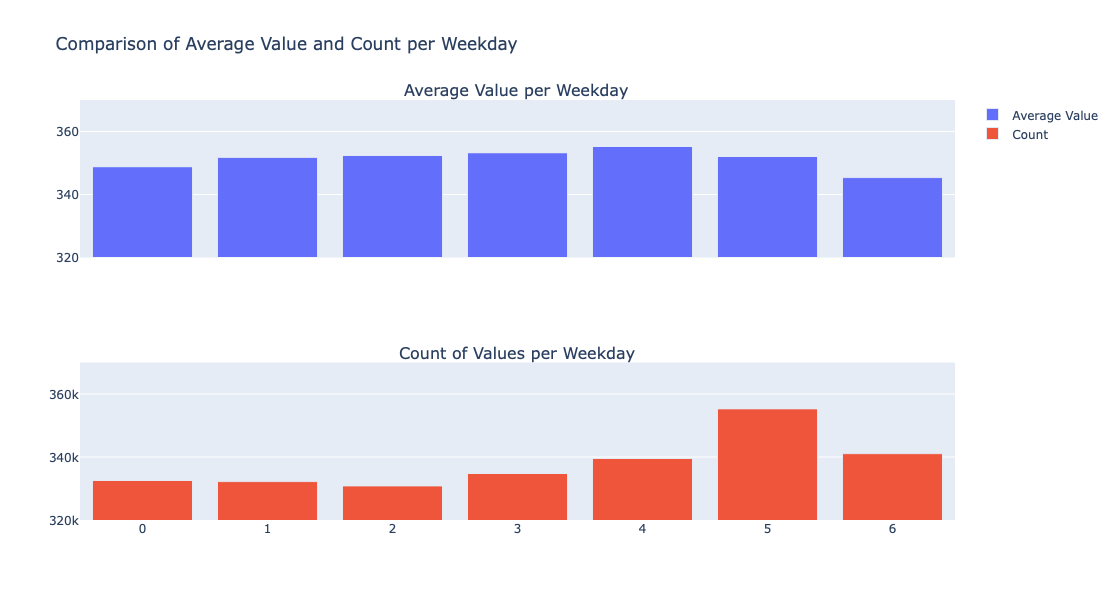

In [240]:

# Grouper par 'weekday' et calculer la moyenne des valeurs
grouped_mean = time_df.groupby('weekday')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('weekday')['ResponseDuration'].count().reset_index()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Average Value per Weekday", "Count of Values per Weekday"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['weekday'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['weekday'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot
fig.update_yaxes(range=[320000, 370000], row=2, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot


# Mettre à jour les annotations et les titres
fig.update_layout(title='Comparison of Average Value and Count per Weekday',
                  height=600, width=600, showlegend=True)

fig.show()

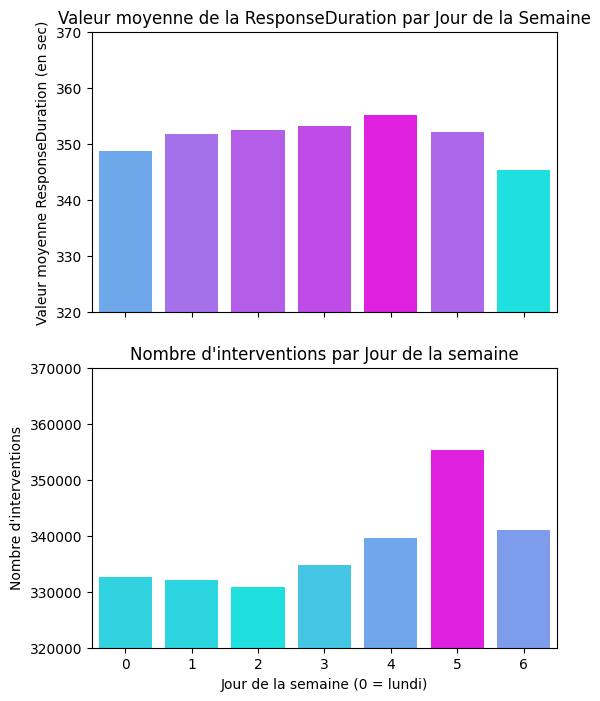

In [278]:
# Calculer la moyenne et le compte par jour de la semaine
grouped_mean = time_df.groupby('weekday')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('weekday')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='weekday', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='weekday', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par Jour de la Semaine')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='weekday', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='weekday', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par Jour de la semaine")
axs[1].set_ylabel("Nombre d'interventions")
axs[1].set_ylim(320000, 370000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque mois", fontsize=16)
plt.xlabel('Jour de la semaine (0 = lundi)')

# Afficher le graphique
plt.show()

##### Hours

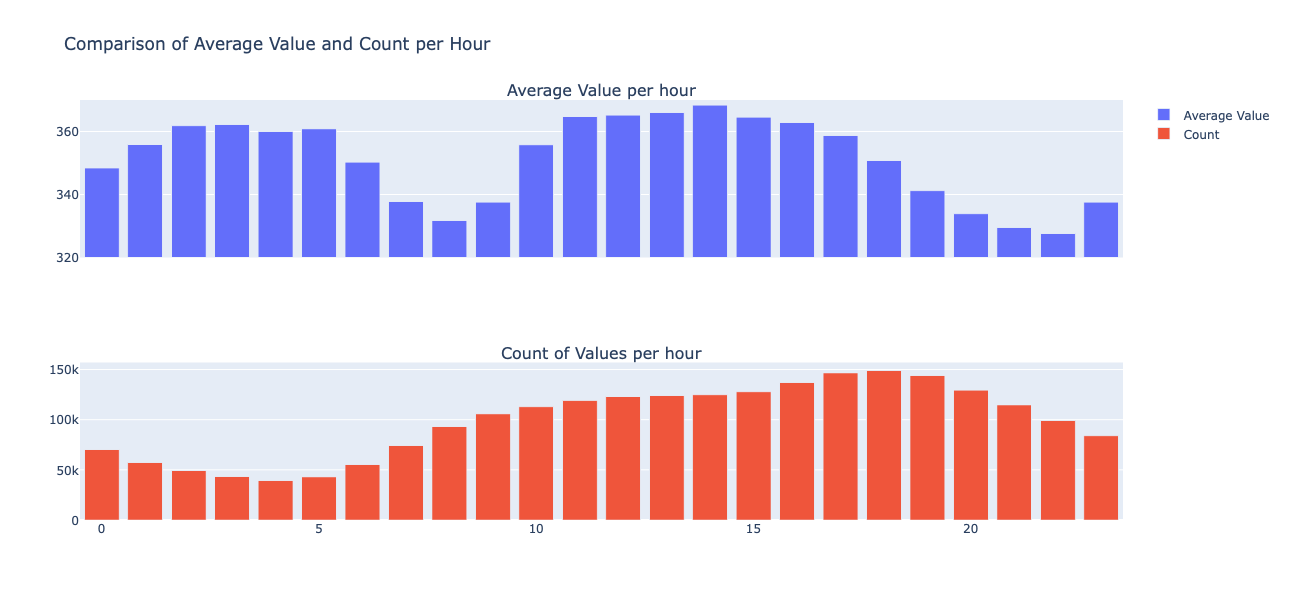

In [239]:
# Grouper par 'hour' et calculer la moyenne des valeurs
grouped_mean = time_df.groupby('hour')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('hour')['ResponseDuration'].count().reset_index()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Average Value per hour", "Count of Values per hour"))

# Ajouter le premier graphique (moyenne des valeurs)
fig.add_trace(go.Bar(x=grouped_mean['hour'], y=grouped_mean['ResponseDuration'], name='Average Value'), row=1, col=1)

# Ajouter le deuxième graphique (compte des valeurs)
fig.add_trace(go.Bar(x=grouped_count['hour'], y=grouped_count['ResponseDuration'], name='Count'), row=2, col=1)

# Mettre à jour l'échelle de l'axe des ordonnées
fig.update_yaxes(range=[320, 370], row=1, col=1)  # Définir l'intervalle de 320 à 370 pour l'échelle y du premier subplot

# Mettre à jour les annotations et les titres
fig.update_layout(title='Comparison of Average Value and Count per Hour',
                  height=600, width=800, showlegend=True)

fig.show()

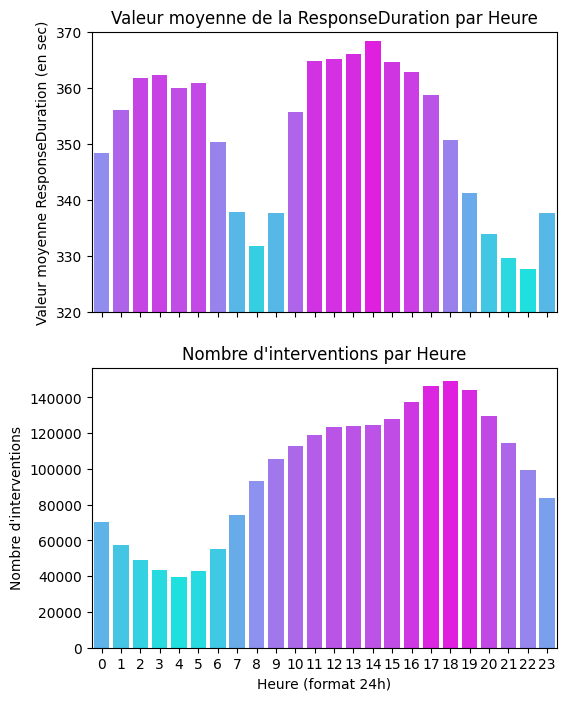

In [279]:
# Calculer la moyenne et le compte par heure
grouped_mean = time_df.groupby('hour')['ResponseDuration'].mean().reset_index()
grouped_count = time_df.groupby('hour')['ResponseDuration'].count().reset_index()

# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='cool'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='hour', y='ResponseDuration', data=grouped_mean, ax=axs[0], hue='hour', palette=mean_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par Heure')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (en sec)')
axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
count_colors = list(normalize_color(grouped_count['ResponseDuration']))
sns.barplot(x='hour', y='ResponseDuration', data=grouped_count, ax=axs[1], hue='hour', palette=count_colors, dodge=False, legend=False)
axs[1].set_title("Nombre d'interventions par Heure")
axs[1].set_ylabel("Nombre d'interventions")

# Ajuster les titres et les annotations
#plt.suptitle("Comparaison de la durée moyenne du ResponseDuration au nombre d'intervention comptabilisées chaque mois", fontsize=16)
plt.xlabel('Heure (format 24h)')

# Afficher le graphique
plt.show()

#### Countplots

##### StopCodeDescription

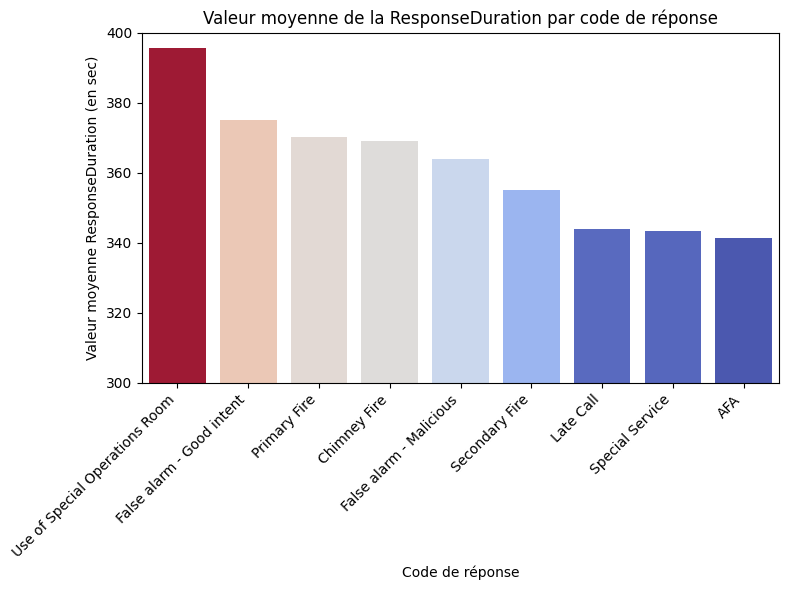

In [318]:
# Calculer la moyenne par 'StopCodeDescription'
grouped_mean = master_df.groupby('StopCodeDescription')['ResponseDuration'].mean().reset_index()
grouped_mean = grouped_mean.sort_values(by='ResponseDuration', ascending=False)


# Créer une figure pour le graphique
plt.figure(figsize=(8, 6))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='StopCodeDescription', y='ResponseDuration', hue='StopCodeDescription', data=grouped_mean, palette=mean_colors)
plt.title('Valeur moyenne de la ResponseDuration par code de réponse')
plt.xlabel('Code de réponse')
plt.ylabel('Valeur moyenne ResponseDuration (en sec)')
plt.ylim(300, 400)  # Ajuster l'échelle de l'axe des ordonnées si nécessaire
plt.xticks(rotation=45, ha='right')  # Ajuster l'orientation et l'alignement des étiquettes x

# Afficher le graphique
plt.tight_layout()
plt.show()

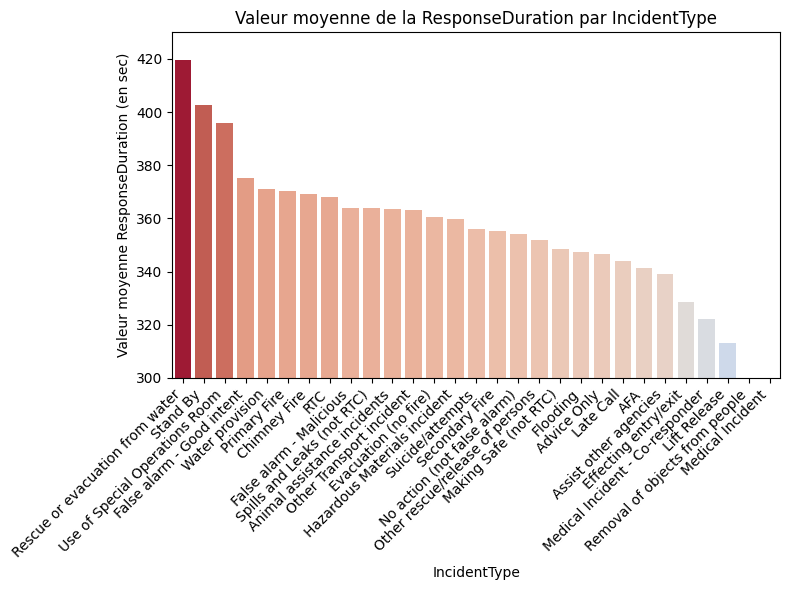

In [34]:
# Calculer la moyenne par IncidentType
grouped_mean = master_df.groupby('IncidentType')['ResponseDuration'].mean().reset_index()
grouped_mean = grouped_mean.sort_values(by='ResponseDuration', ascending=False)


# Créer une figure pour le graphique
plt.figure(figsize=(8, 6))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='IncidentType', y='ResponseDuration', hue='IncidentType', data=grouped_mean, palette=mean_colors)
plt.title('Valeur moyenne de la ResponseDuration par IncidentType')
plt.xlabel('IncidentType')
plt.ylabel('Valeur moyenne ResponseDuration (en sec)')
plt.ylim(300, 430)  # Ajuster l'échelle de l'axe des ordonnées si nécessaire
plt.xticks(rotation=45, ha='right')  # Ajuster l'orientation et l'alignement des étiquettes x

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
# Calculer la moyenne par 'StopCodeDescription'
grouped_mean = master_df.groupby('I')['ResponseDuration'].mean().reset_index()
grouped_mean = grouped_mean.sort_values(by='ResponseDuration', ascending=False)


# Créer une figure pour le graphique
plt.figure(figsize=(8, 6))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le graphique (moyenne des valeurs)
mean_colors = list(normalize_color(grouped_mean['ResponseDuration']))
sns.barplot(x='StopCodeDescription', y='ResponseDuration', hue='StopCodeDescription', data=grouped_mean, palette=mean_colors)
plt.title('Valeur moyenne de la ResponseDuration par code de réponse')
plt.xlabel('Code de réponse')
plt.ylabel('Valeur moyenne ResponseDuration (en sec)')
plt.ylim(300, 400)  # Ajuster l'échelle de l'axe des ordonnées si nécessaire
plt.xticks(rotation=45, ha='right')  # Ajuster l'orientation et l'alignement des étiquettes x

# Afficher le graphique
plt.tight_layout()
plt.show()

##### PropertyCategory / AddressQualifier

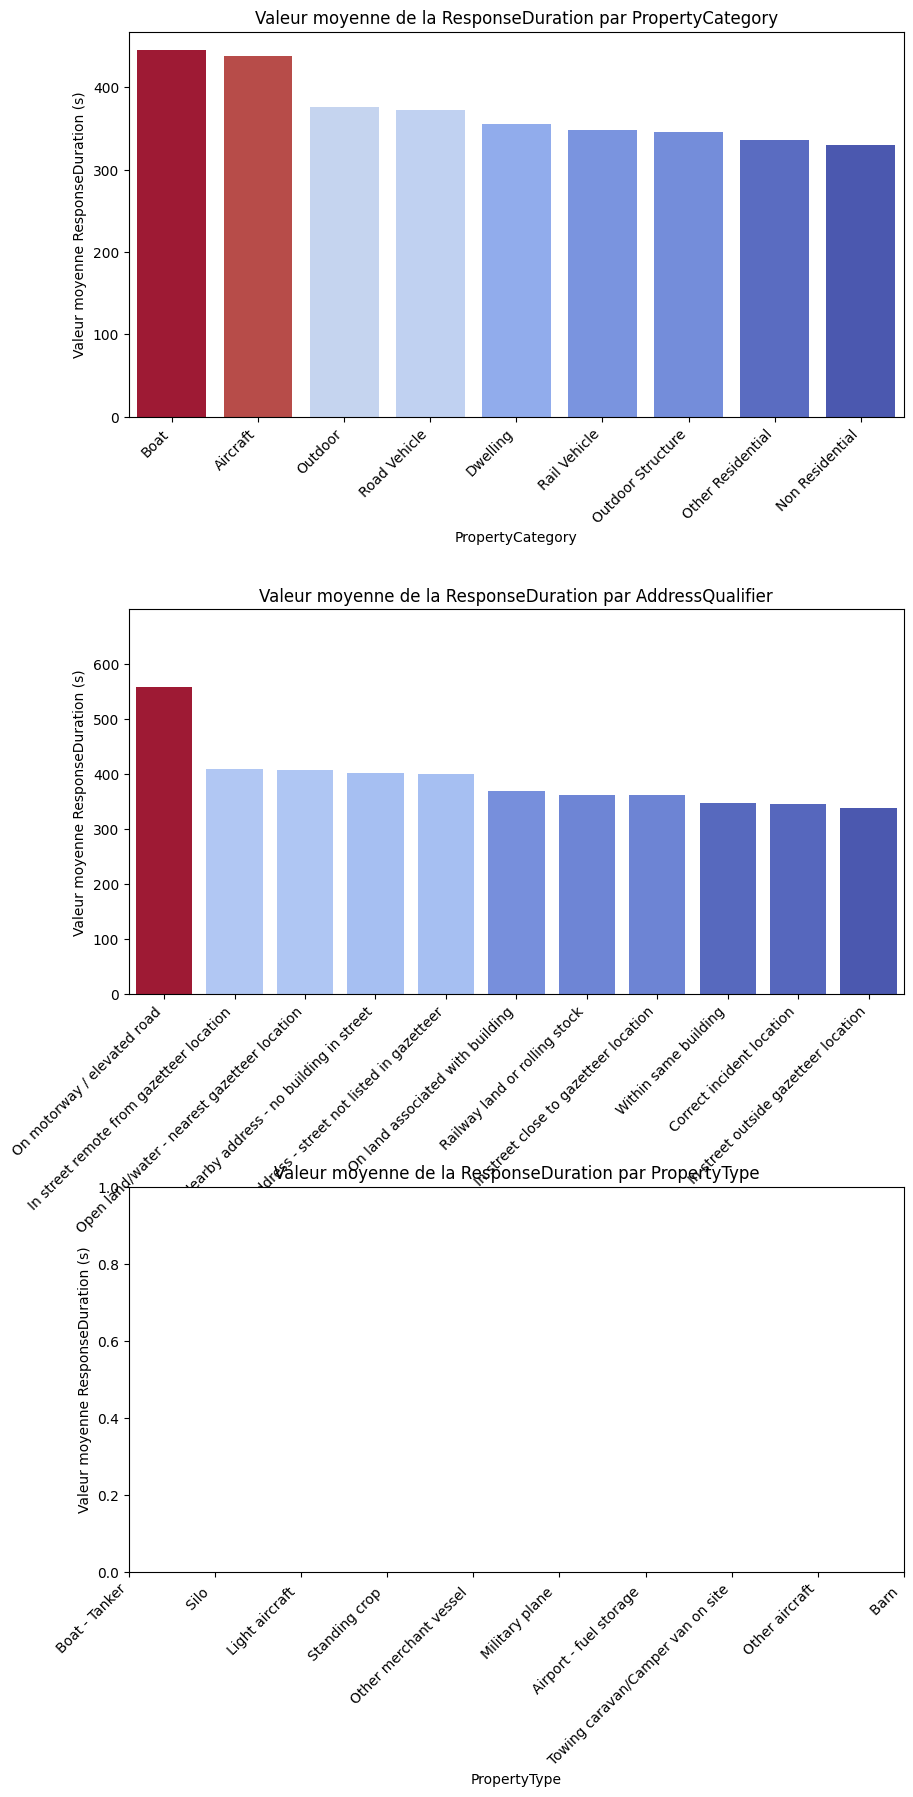

In [26]:
# Calculer la moyenne et le compte par année
grouped_mean1 = master_df.groupby('PropertyCategory')['ResponseDuration'].mean().reset_index()
grouped_mean2 = master_df.groupby('AddressQualifier')['ResponseDuration'].mean().reset_index()
grouped_mean3 = master_df.groupby('PropertyType')['ResponseDuration'].mean().reset_index()

grouped_mean1 = grouped_mean1.sort_values(by='ResponseDuration', ascending=False)
grouped_mean2 = grouped_mean2.sort_values(by='ResponseDuration', ascending=False)
grouped_mean3 = grouped_mean3.sort_values(by='ResponseDuration', ascending=False).head(10)


# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# Fonction pour normaliser les couleurs en fonction de la hauteur des barres
def normalize_color(values, cmap='coolwarm'):
    norm = plt.Normalize(values.min(), values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return sm.to_rgba(values)

# Ajouter le premier graphique (moyenne des valeurs)
mean1_colors = list(normalize_color(grouped_mean1['ResponseDuration']))
sns.barplot(x='PropertyCategory', y='ResponseDuration', data=grouped_mean1, ax=axs[0], hue='PropertyCategory', palette=mean1_colors, dodge=False, legend=False)
axs[0].set_title('Valeur moyenne de la ResponseDuration par PropertyCategory')
axs[0].set_ylabel('Valeur moyenne ResponseDuration (s)')
axs[0].set_xlabel('PropertyCategory')
axs[0].set_xticks(range(len(grouped_mean1)))  # Définir les positions des ticks
axs[0].set_xticklabels(grouped_mean1['PropertyCategory'], rotation=45, ha='right')
#axs[0].set_ylim(320, 370)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
mean2_colors = list(normalize_color(grouped_mean2['ResponseDuration']))
sns.barplot(x='AddressQualifier', y='ResponseDuration', data=grouped_mean2, ax=axs[1], hue='AddressQualifier', palette=mean2_colors, dodge=False, legend=False)
axs[1].set_title('Valeur moyenne de la ResponseDuration par AddressQualifier')
axs[1].set_ylabel("Valeur moyenne ResponseDuration (s)")
axs[1].set_xlabel('AddressQualifier')
axs[1].set_xticks(range(len(grouped_mean2)))  # Définir les positions des ticks
axs[1].set_xticklabels(grouped_mean2['AddressQualifier'], rotation=45, ha='right')
#axs[1].set_ylim(100000, 200000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter le deuxième graphique (compte des valeurs)
mean3_colors = list(normalize_color(grouped_mean3['ResponseDuration']))
sns.barplot(x='PropertyType', y='ResponseDuration', data=grouped_mean3, ax=axs[1], hue='PropertyType', palette=mean3_colors, dodge=False, legend=False)
axs[2].set_title('Valeur moyenne de la ResponseDuration par PropertyType')
axs[2].set_ylabel("Valeur moyenne ResponseDuration (s)")
axs[2].set_xlabel('PropertyType')
axs[2].set_xticks(range(len(grouped_mean3)))  # Définir les positions des ticks
axs[2].set_xticklabels(grouped_mean3['PropertyType'], rotation=45, ha='right')
#axs[1].set_ylim(100000, 200000)  # Ajuster l'échelle de l'axe des ordonnées

# Ajouter de l'espace entre les deux graphiques
fig.subplots_adjust(hspace=0.5)  # Ajustez cette valeur pour ajouter plus ou moins d'espace

# Afficher le graphique
plt.show()

#### NumCalls

In [ ]:
# Créer une figure pour le graphique
plt.figure(figsize=(10, 10))

sns.catplot(data = master_df, x='NumCalls', y='ResponseDuration', kind = 'swarm')
#plt.title('Valeur moyenne de la ResponseDuration par code de réponse')
plt.xlabel("Nombre d'appels")
plt.ylabel('ResponseDuration (en sec)')
#plt.ylim(300, 400)  # Ajuster l'échelle de l'axe des ordonnées si nécessaire
plt.xticks(rotation=45, ha='right')  # Ajuster l'orientation et l'alignement des étiquettes x

plt.show()